<a href="https://colab.research.google.com/github/Voisinus2000/Ois24_Voisin_No-/blob/main/Notebook_pour_imagerie_thermique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook_pour_imagerie_thermique.ipynb**

L. Halloran

Ceci est un notebook pour colab (https://colab.research.google.com/) pour vous aider à traiter vos données dans la première partie de l'activité "imagerie thermique". Si vous avez des questions, n'hésitez pas à en discuter avec l'encadrant..

ATTENTION: Sauvegardez vos modifications... ça ne se fait pas automatiquement. 😲


Importer les modules qu'il nous faut...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from scipy.optimize import curve_fit

In [2]:
#Use to import the file into google Colab drive
from google.colab import files
#Use to import io, which opens the file from the Colab drive
import io

ici, vous allez uploader votre fichier...

In [3]:
uploaded = files.upload()


Saving Donnés.xlsx to Donnés.xlsx


maintenant, on convertit le fichier à un "data frame". On le fera pour chaque onglet de votre fichier excel...

In [6]:
data1 = pd.read_excel('Donnés.xlsx','12mm') # changez le nom du fichier et les noms des onglets/feuilles
data2 = pd.read_excel('Donnés.xlsx','23mm')
data3 = pd.read_excel('Donnés.xlsx','32mm')
data4 = pd.read_excel('Donnés.xlsx','43mm')
data5 = pd.read_excel('Donnés.xlsx','53mm')
data6 = pd.read_excel('Donnés.xlsx','62mm')
# etc.


ceci efface le fichier uploadé (si vous voulez re-uploader un autre avec le même nom, par exemple)

In [ ]:
!rm {'exemple_T.xlsx'}

rm: cannot remove 'exemple_T.xlsx': No such file or directory


on verifie ce qu'on a uploadé...

In [7]:
print(data1)
print(data2)
print(data3)
print(data4)
print(data5)
print(data6)
# etc.

    temps (s) (+-1s)  T (degC)  delta T (degC)
0                  0      24.0             0.0
1                 20      34.3            10.3
2                 35      38.2            14.2
3                 50      39.2            15.2
4                 65      38.2            14.2
5                 90      37.6            13.6
6                105      36.1            12.1
7                120      35.6            11.6
8                150      34.7            10.7
9                180      33.8             9.8
10               210      33.0             9.0
11               240      32.5             8.5
12               270      31.6             7.6
13               300      31.5             7.5
14               330      30.9             6.9
15               360      30.9             6.9
16               390      30.2             6.2
17               420      30.0             6.0
    temps (s) (+-1s)  T (degC)  delta T (degC)
0                  0      24.0             0.0
1            

pour selectioner les données qu'il vous faut pour l'ajustement de courbes...
il faut ecrire le nom exacte que vous avez donné aux colonnes de temperature et temps, e.g., `'temps (s)'`

In [86]:
deltaT = data5['delta T (degC)'] # deltaT = T - T0
temps = data5['temps (s) (+-1s)']

# ici on enleve la première valeur (ça ne marchera pas avec l'équation car division par 0)...
deltaT = deltaT[1:]
temps = temps[1:]

Definir l'equation a ajuster. NOTEZ: changez la valeur de x (ici 0.01 m) pour correspondre avec les données selectionnées (e.g., x=10mm).

In [97]:
def function_for_fit(t,alpha,c0): #eqn. 48, avec x = 10 mm. il faudra changer cet x pour chaque x different. n'oublie pas qu'on utilise des unitées SI (donc metres pas centimetres)
    return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.053**2/(4*alpha*t) )

Voir si ce qu'on a fait a du sens. Ici on fait juste une figure avec des valeurs choisis au hazard pour vérifier que l'équation ci-dessus est bien.

<ipython-input-92-d559e91ca084>:2: RuntimeWarning: divide by zero encountered in divide
  return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.012**2/(4*alpha*t) )
<ipython-input-92-d559e91ca084>:2: RuntimeWarning: invalid value encountered in multiply
  return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.012**2/(4*alpha*t) )


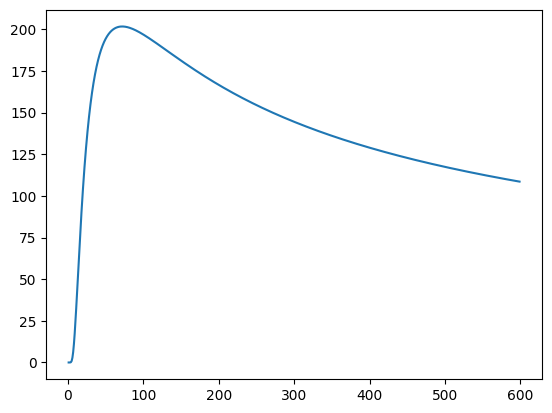

In [93]:
test_t = np.arange(600)
plt.plot(test_t,function_for_fit(test_t,1E-6,10)) # test plot avec alpha = 1E-6 m^2/s et c0 = 10 degC.

faire l'ajustement de courbe

In [94]:
popt, pcov = curve_fit(function_for_fit, temps, deltaT)
#OPTIONEL...
#popt, pcov = curve_fit(function_for_fit, temps, deltaT, p0=[3E6,0.5]) #p0 c'est les valeurs initiales de l'ajustement. vous pouvez les changer si l'ajustement de courbe échoue.

print(popt)
print(pcov)

[4.03857454e-07 1.15202386e-01]
[[ 9.82632532e-15 -1.26385205e-10]
 [-1.26385205e-10  1.21433089e-04]]


notre fonction a 2 parametres (alpha et c0). c'est alpha qui nous interesse. popt contient les valeurs, pvar contient les variances de ces valeurs.

In [95]:
alpha_fit = popt[0]
alpha_ecart_type = np.sqrt(pcov[0,0])
c0_fit = popt[1]
c0_ecart_type = np.sqrt(pcov[1,1])
print('alpha = '+ str(alpha_fit))
print('alpha ecart type = '+ str(alpha_ecart_type))
print('c0 = '+ str(c0_fit))
print('c0 ecart type'+ str(c0_ecart_type))


alpha = 4.03857454016894e-07
alpha ecart type = 9.912782313855432e-08
c0 = 0.11520238642634203
c0 ecart type0.011019668268021254


Maintenant faites une figure de vos données et la courbe ajustée...

<ipython-input-92-d559e91ca084>:2: RuntimeWarning: divide by zero encountered in divide
  return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.012**2/(4*alpha*t) )
<ipython-input-92-d559e91ca084>:2: RuntimeWarning: invalid value encountered in multiply
  return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.012**2/(4*alpha*t) )


Text(0.5, 1.0, 'Hauteur de mesure 6 (62mm)')

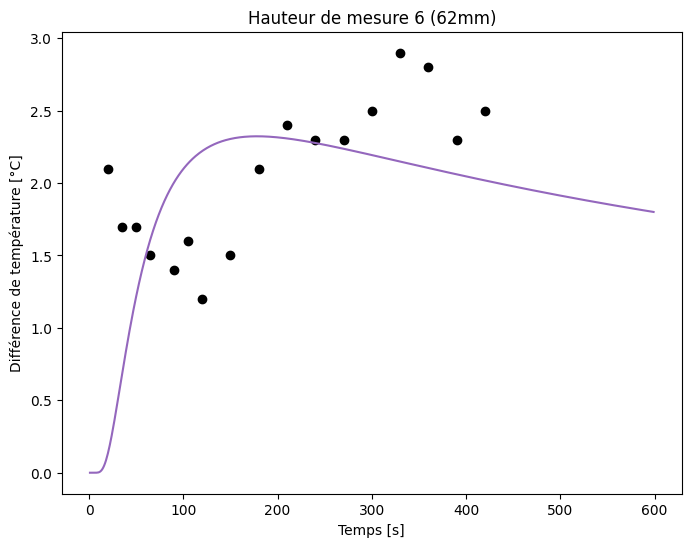

In [96]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(temps,deltaT,'ko')
timeforgraph = np.arange(600)
ax.plot(function_for_fit(timeforgraph,alpha_fit,c0_fit),'#9467bd')
ax.set_xlabel('Temps [s]')
ax.set_ylabel('Différence de température [°C]')
plt.title('Hauteur de mesure 6 (62mm)')


maintenant notez ces valeurs et refaire ces derniers etapes pour chaque distance x...

<ipython-input-15-d559e91ca084>:2: RuntimeWarning: divide by zero encountered in divide
  return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.012**2/(4*alpha*t) )
<ipython-input-15-d559e91ca084>:2: RuntimeWarning: invalid value encountered in multiply
  return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.012**2/(4*alpha*t) )


Text(0.5, 1.0, 'Hauteur de mesure 1 (12mm)')

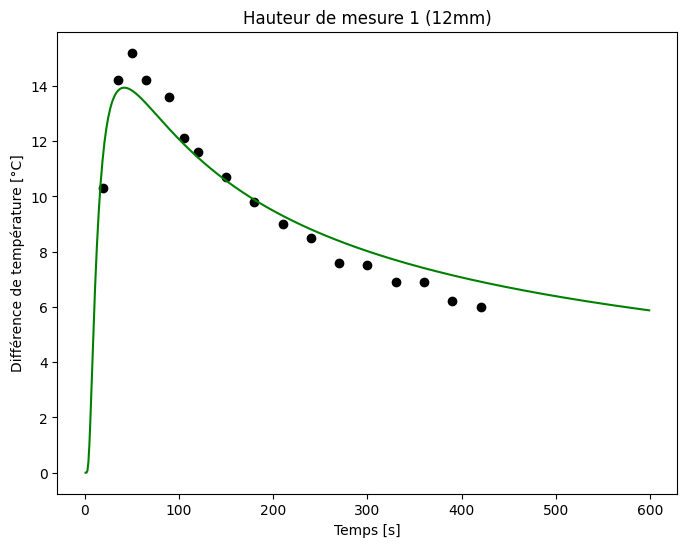